In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Charger les données
data = pd.read_csv("/content/gdrive/Shareddrives/DA tools/ORANGE_PROFILING/customer_segmentation_data.csv")

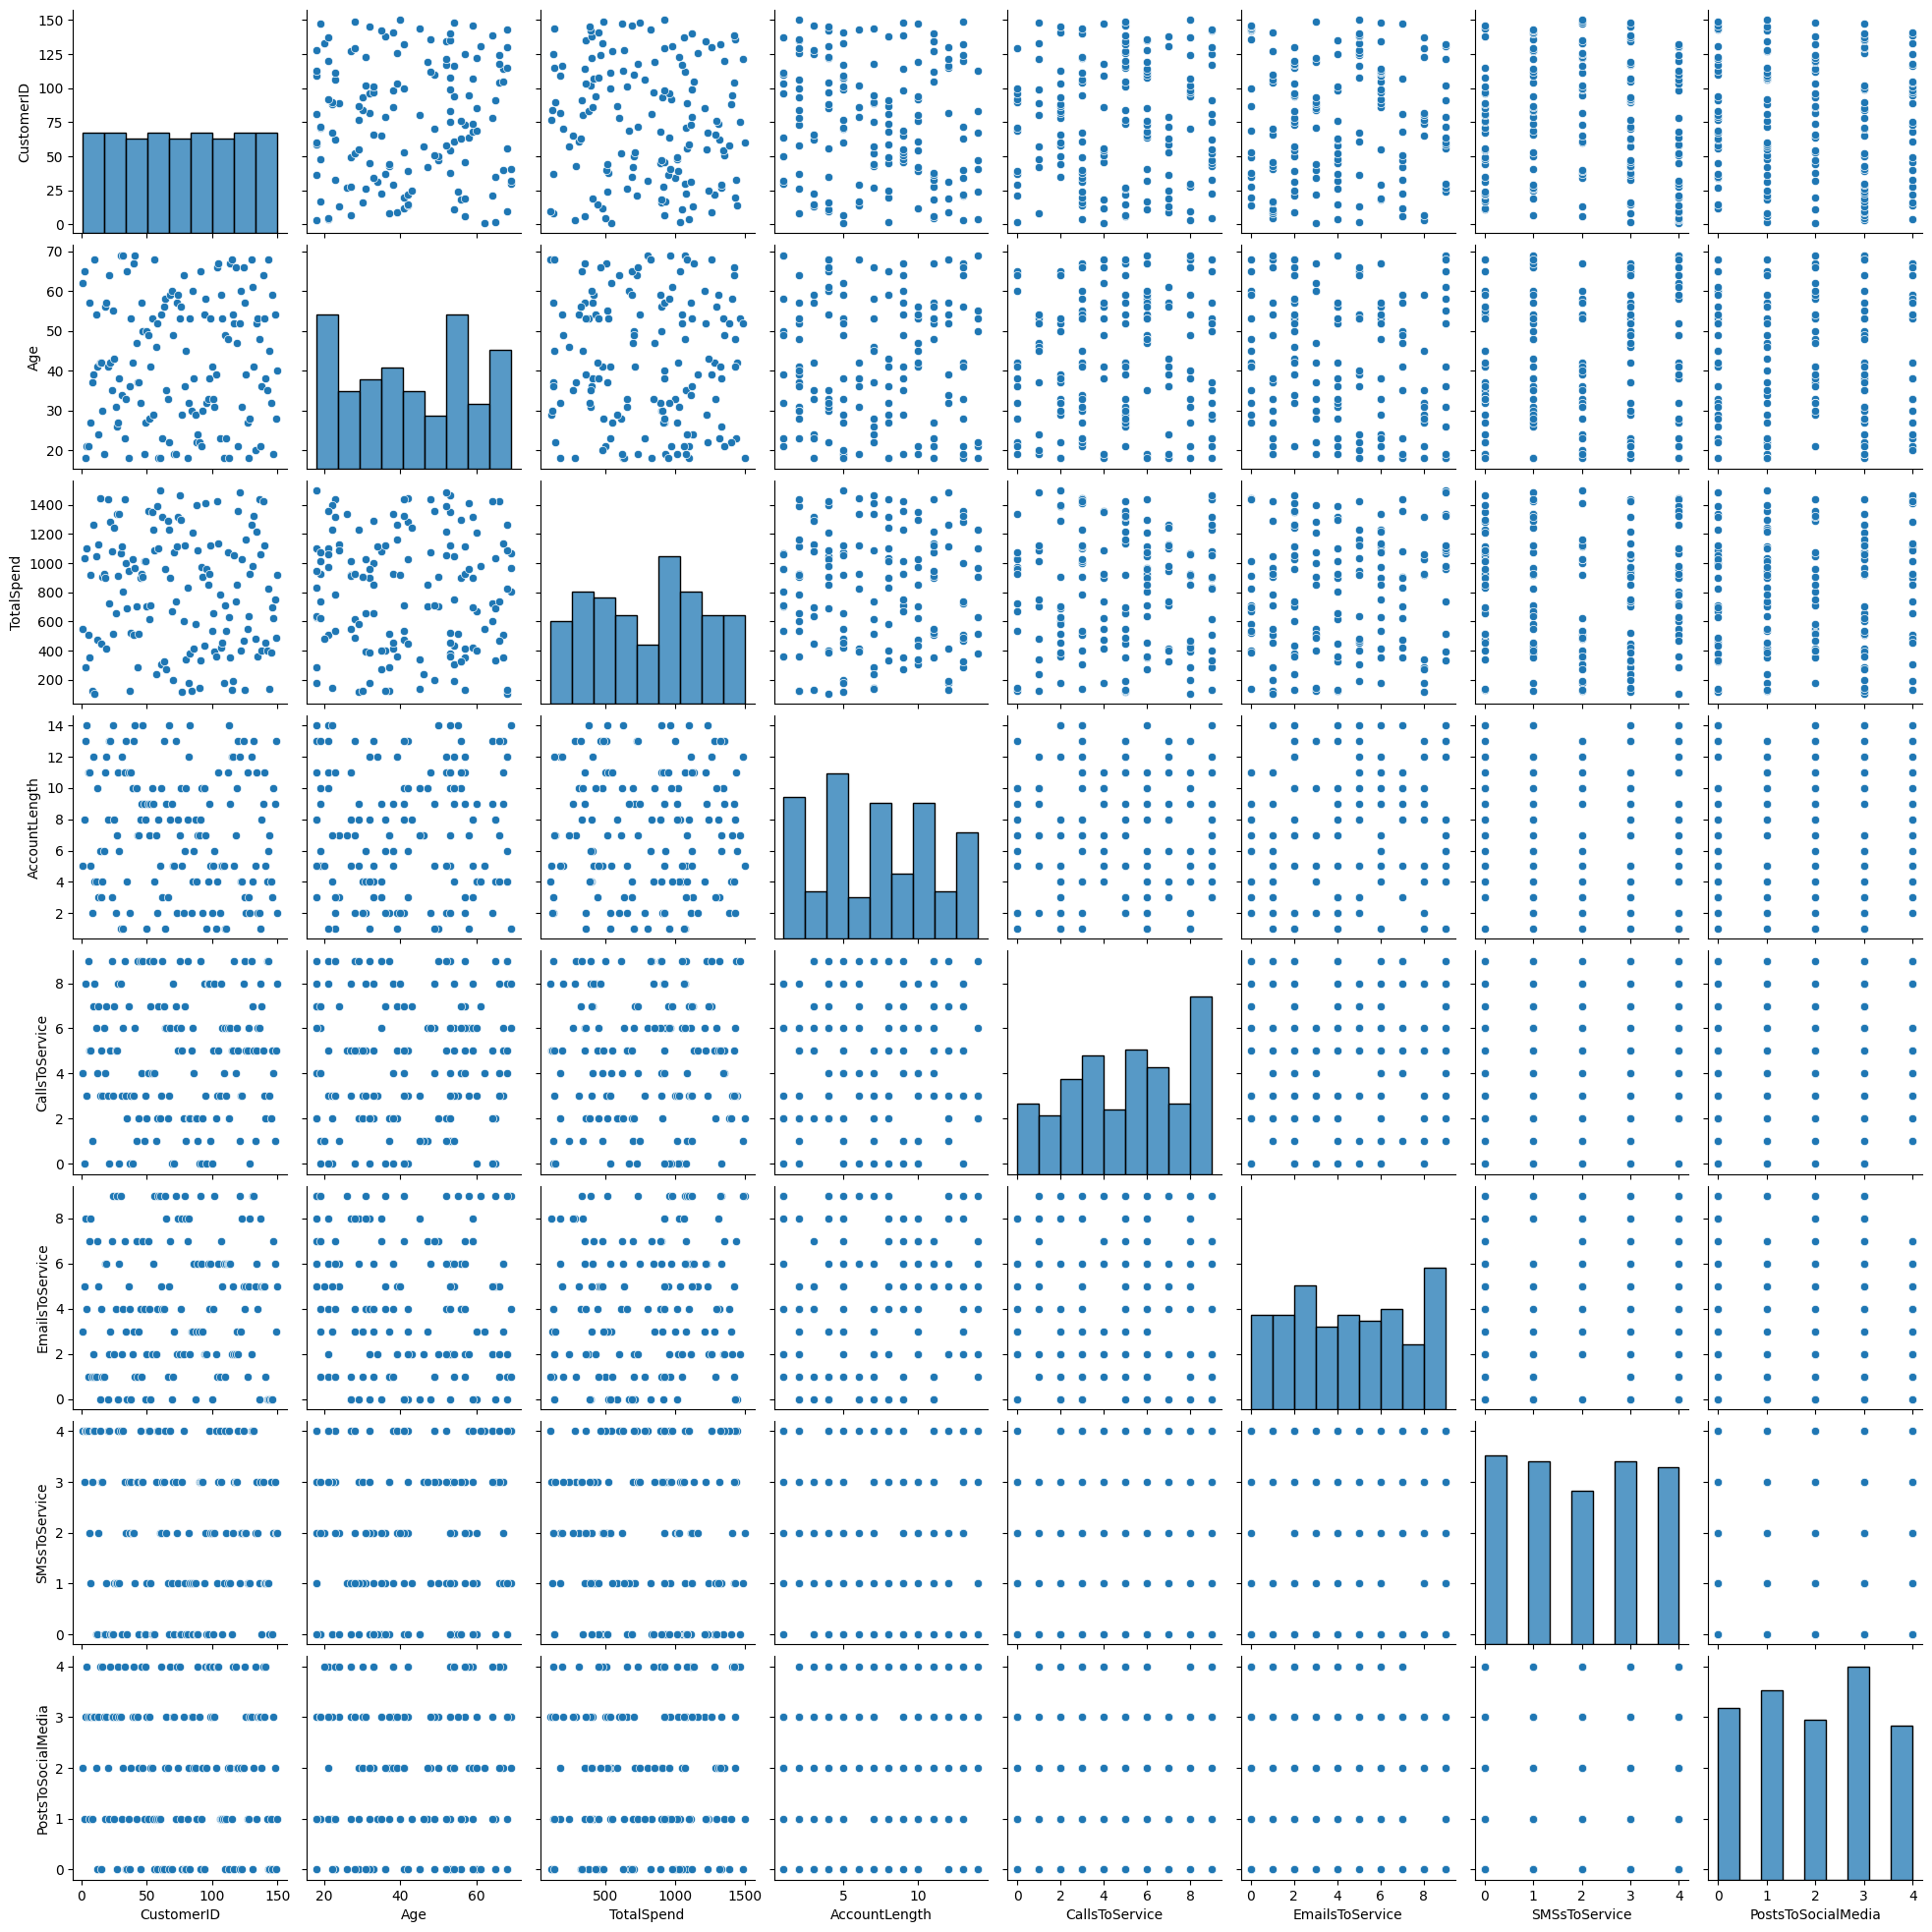

In [30]:
#Plottings pairs of variables
#Correlation and distribution study

data_preprocessed = data.drop('CustomerID', axis=1)
sns.pairplot(data)
plt.show()

**Frequency of Contact per Method (CallsToService, EmailsToService, SMSsToService, PostsToSocialMedia):
These KPIs are direct indicators of how frequently a customer uses each contact method. High frequency in a particular method suggests a preference for that method.

TotalSpend:
This could indicate the customer's value to the company. Combined with contact preferences, it can help identify high-value customers and their preferred communication channels.

AccountLength:
The duration of the customer's relationship with the company might influence their communication preferences, with longer-term customers potentially having different preferences than newer customers.

Age:
Age can be a proxy for customer behavior and technology usage patterns, influencing their preferred contact methods. **

In [ ]:
data_preprocessed.isnull().sum()

In [ ]:
data_preprocessed.duplicated().sum()

In [ ]:
# Prétraitement des données
num_features = data_preprocessed.select_dtypes(include=['int64', 'float64']).columns
cat_features = ['LastContactMethod']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])
data_transformed = preprocessor.fit_transform(data_preprocessed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

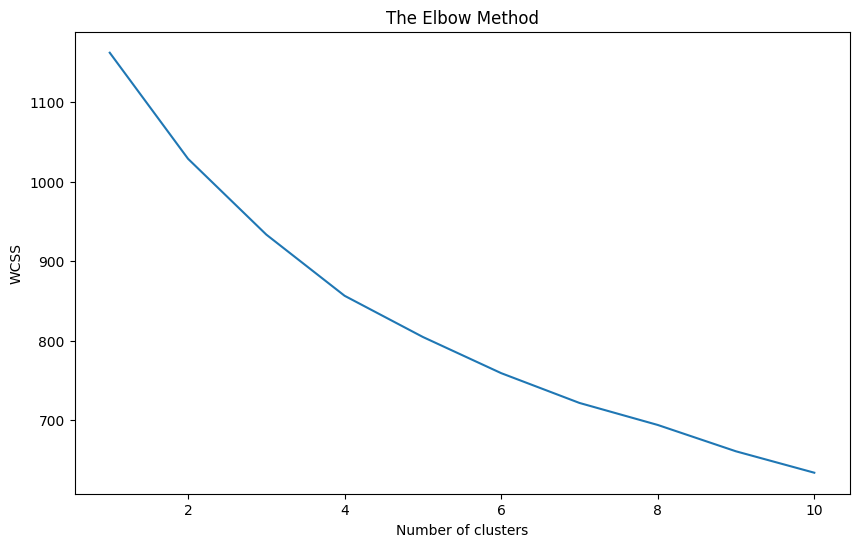

In [14]:
# Détermination du nombre de clusters (Méthode du coude)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_transformed)
    wcss.append(kmeans.inertia_)
# Tracer le graphique de la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

In [19]:
# Appliquer K-means avec 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(data_transformed)

# Ajouter les labels de cluster au DataFrame prétraité
data_preprocessed['Cluster'] = clusters

# Calculer les centroïdes des clusters
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


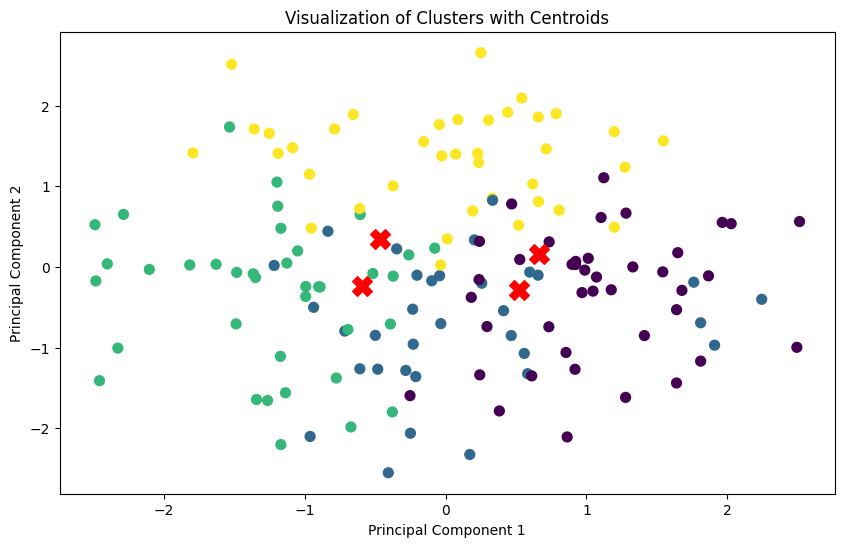

In [20]:
# Visualiser les clusters et les centres
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')  # Centres des clusters
plt.title('Visualization of Clusters with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [21]:
# Calculer et afficher des statistiques sur les clusters
cluster_stats = data_preprocessed.groupby('Cluster').agg(['mean', 'std', 'count'])
print(cluster_stats)

               Age                   TotalSpend                    \
              mean        std count        mean         std count   
Cluster                                                             
0        33.048780  10.730683    41  710.404399  372.448156    41   
1        50.696970  13.010776    33  688.971295  376.036702    33   
2        35.078947  15.596919    38  940.217125  356.228733    38   
3        52.921053  13.103294    38  869.550341  430.139282    38   

        AccountLength                 CallsToService  ...        \
                 mean       std count           mean  ... count   
Cluster                                               ...         
0            4.268293  2.588671    41       2.463415  ...    41   
1            9.909091  3.024521    33       3.909091  ...    33   
2            7.315789  3.884169    38       6.736842  ...    38   
3            7.947368  3.890024    38       5.631579  ...    38   

        EmailsToService                 SMSsTo

<ipython-input-21-c0c670537133>:2: FutureWarning: ['LastContactMethod'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cluster_stats = data_preprocessed.groupby('Cluster').agg(['mean', 'std', 'count'])


**Conclusions**

Cluster 0: Un groupe jeune avec des dépenses modérées et une durée de compte plus courte. Ils ont des besoins de service limités et pourraient être technologiquement avertis.
Canal de Communication Préféré : Probablement des canaux numériques tels que les e-mails, indiquant une préférence pour des interactions rapides et peut-être automatisées.

Cluster 1: Un segment plus âgé avec une longue durée de compte, des dépenses légèrement inférieures, et une utilisation modérée des services client. Ils pourraient valoriser la tradition et la fiabilité.
Canal de Communication Préféré : Probablement des canaux numériques tels que les e-mails, indiquant une préférence pour des interactions rapides et peut-être automatisées.

Cluster 2: Un groupe d'âge moyen avec la plus grande variabilité d'âge, ils sont les plus grands dépensiers et ont tendance à contacter le service client plus fréquemment.
Canal de Communication Préféré : Le téléphone/e-mails, indiquant un besoin de résolution de problèmes en direct et une possible préférence pour un service client proactif.

Cluster 3: Ce cluster, semblable au Cluster 1 en termes d'âge, a des dépenses élevées et montre une forte activité sur les réseaux sociaux.
Canal de Communication Préféré : Le téléphone, indiquant un besoin de résolution de problèmes en direct et une possible préférence pour un service client proactif.
